<a href="https://colab.research.google.com/github/yniu87/TeachStatistics/blob/master/anscombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Anscombe's Quartet
==================




mean=7.50, std=1.94, correlation=0.82
mean=7.50, std=1.94, correlation=0.82
mean=7.50, std=1.94, correlation=0.82
mean=7.50, std=1.94, correlation=0.82


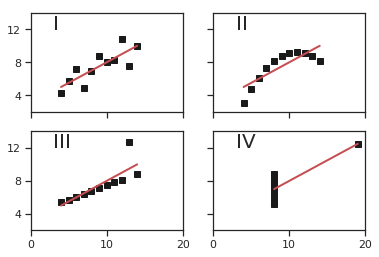

In [23]:
"""
Edward Tufte uses this example from Anscombe to show 4 datasets of x
and y that have the same mean, standard deviation, and regression
line, but which are qualitatively different.
"""

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]


def fit(x):
  return 3 + 0.5 * x


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

xfit = np.array([np.min(x), np.max(x)])
axs[0, 0].plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[0, 1].plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[1, 0].plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
xfit = np.array([np.min(x4), np.max(x4)])
axs[1, 1].plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, correlation=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))
    
for ax, label in zip(axs.flat, ['I', 'II', 'III', 'IV']):
    ax.label_outer()
    ax.text(3, 12, label, fontsize=20)
    
      
plt.show()

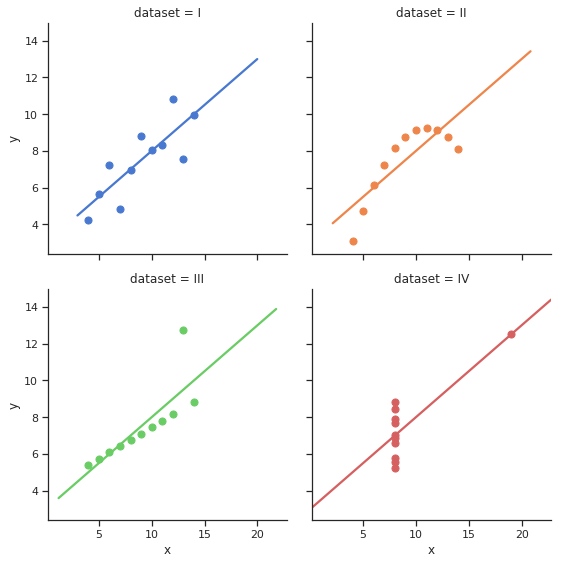

In [19]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})